In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
La = LabelEncoder()

In [6]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
# Read File
train=pd.read_csv('D:/Pallavi/Data Science/Maths/blackfriday/train.csv')
test=pd.read_csv('D:/Pallavi/Data Science/Maths/blackfriday/test.csv')
black=train.append(test)

In [13]:
# Top 5 rows of dataset
black.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
# Checks Rows and columns of data
black.shape

(783667, 12)

In [14]:
# Analisys of int/float columns
black.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [15]:
# High analysis of string columns
black.describe(include="O")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,783667,783667,783667,783667,783667
unique,3677,2,7,3,5
top,P00265242,M,26-35,B,1
freq,2709,590031,313015,329739,276425


### Find Unique values of categories

In [17]:
black['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [18]:
black['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [19]:
black['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

### Finding the null Values

In [20]:
na_percentage = (black.isnull().sum()/black.shape[0]*100).sort_values(ascending=False)
print(na_percentage)

Product_Category_3            69.648078
Product_Category_2            31.388587
Purchase                      29.808452
User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
dtype: float64


## Null Value Correction

In [21]:
black["Product_Category_3"]

0          NaN
1         14.0
2          NaN
3          NaN
4          NaN
          ... 
233594     NaN
233595     NaN
233596    12.0
233597     NaN
233598     NaN
Name: Product_Category_3, Length: 783667, dtype: float64

In [30]:
black["Product_Category_3"].fillna(black["Product_Category_3"].mean(),inplace=True)

In [31]:
black

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,12.668605,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.000000,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,12.668605,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,12.668605,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,12.668605,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,12.668605,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,12.668605,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.000000,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,12.668605,NaN


In [32]:
black["Product_Category_2"].fillna(black["Product_Category_2"].mean(),inplace=True)

In [33]:
black

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.844506,12.668605,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.844506,12.668605,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668605,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.844506,12.668605,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,9.844506,12.668605,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.000000,12.668605,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.000000,12.000000,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.000000,12.668605,NaN


<AxesSubplot:xlabel='User_ID', ylabel='count'>

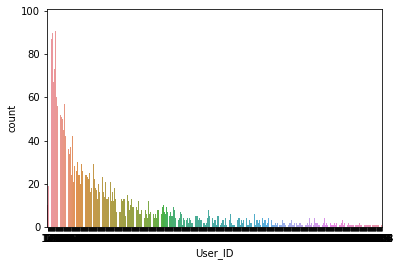

In [35]:
# Plot the chart of 
sns.countplot(black['User_ID'].value_counts())

<AxesSubplot:xlabel='Product_Category_1', ylabel='Density'>

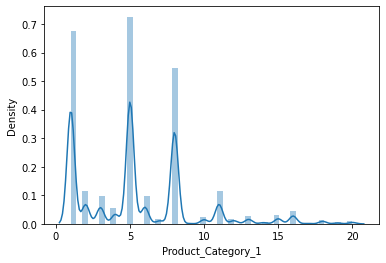

In [37]:
sns.distplot(black['Product_Category_1'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='Density'>

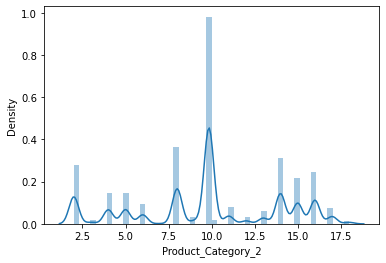

In [38]:
sns.distplot(black['Product_Category_2'])

<AxesSubplot:xlabel='Product_Category_3', ylabel='Density'>

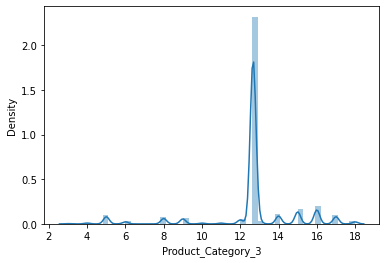

In [39]:
sns.distplot(black['Product_Category_3'])

<AxesSubplot:>

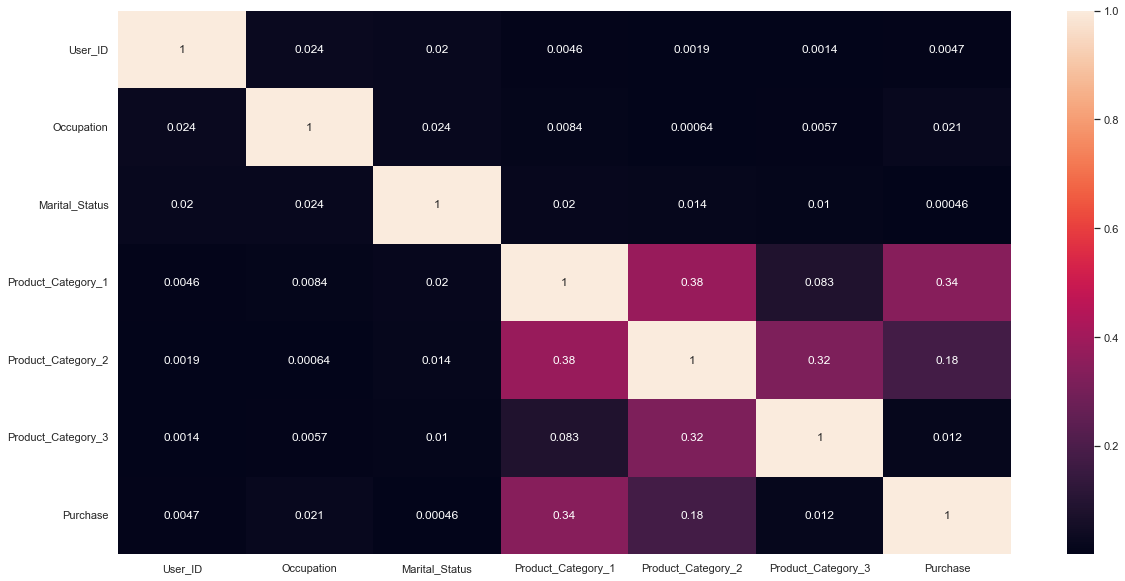

In [48]:
# sns.heatmap(black.corr(),annot=True,vmin=-1,vmax=1,center=0,cmap='coolwarm')

corr = black.corr()
corr = np.abs(corr)
sns.set(rc={'figure.figsize':(20,10)})
hm=sns.heatmap(corr,annot=True)
hm